In [1]:
#手写数字识别
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(7,7)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.layers.normalization import BatchNormalization

epochs = 20
input_shape = (28,28,1)
nb_classes = 10

(X_train,y_train),(X_test,y_test) = mnist.load_data()
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


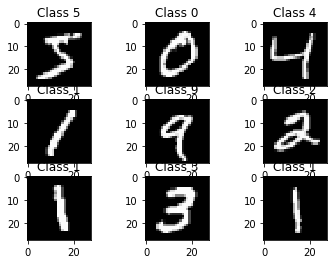

In [2]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],cmap='gray',interpolation='none') #interpolation='none'不需要插值
    plt.title('Class {}'.format(y_train[i])) #类别标签

In [3]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


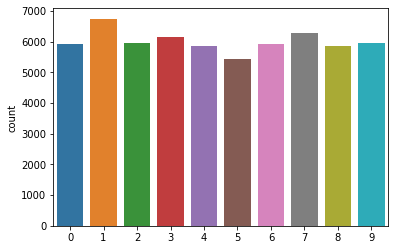

In [4]:
sns.countplot(y_train)

In [5]:
print('y_train:',y_train.shape)

y_train: (60000,)


In [6]:
Y_train = np_utils.to_categorical(y_train,nb_classes) #转换成独热编码
Y_test  = np_utils.to_categorical(y_test,nb_classes)
print('Y_train:',Y_train.shape)

Y_train: (60000, 10)


In [7]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape)) # he正态分布初始化方法
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same')) #padding='same'：输出矩阵大小与输入一样
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
#model.add(Conv2D(128,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(nb_classes,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [8]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
# ImageDataGenerator()是keras.preprocessing.image模块中的图片生成器，同时也可以在batch中对数据进行增强，
# 扩充数据集大小，增强模型的泛化能力。比如进行旋转，变形，归一化等等。
# 数据归一化：均值为零，方差为标准方差
# featurewise_center: Boolean. 对输入的图片每个通道减去每个通道对应均值。
#https://www.jianshu.com/p/d23b5994db64
datagen.fit(X_train)

#保存效果最好的模型
filepath = 'model.hdf5'
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath,monitor='val_acc',save_best_only=True,mode='max')

h = model.fit_generator(datagen.flow(X_train,Y_train,batch_size=1000),
                       steps_per_epoch=len(X_train)/1000,epochs=epochs,
                       validation_data=datagen.flow(X_test,Y_test,batch_size=len(X_test)),
                       validation_steps=1,callbacks=[checkpointer])

Epoch 1/20
60/60 [==============================] - 11s 183ms/step - loss: 0.4577 - acc: 0.8584 - val_loss: 0.0948 - val_acc: 0.9734
Epoch 2/20
60/60 [==============================] - 4s 69ms/step - loss: 0.0970 - acc: 0.9712 - val_loss: 0.0563 - val_acc: 0.9849
Epoch 3/20
60/60 [==============================] - 4s 69ms/step - loss: 0.0636 - acc: 0.9809 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 4/20
60/60 [==============================] - 4s 69ms/step - loss: 0.0501 - acc: 0.9850 - val_loss: 0.0303 - val_acc: 0.9904
Epoch 5/20
60/60 [==============================] - 4s 69ms/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 6/20
60/60 [==============================] - 4s 70ms/step - loss: 0.0360 - acc: 0.9889 - val_loss: 0.0251 - val_acc: 0.9924
Epoch 7/20
60/60 [==============================] - 4s 71ms/step - loss: 0.0331 - acc: 0.9900 - val_loss: 0.0215 - val_acc: 0.9924
Epoch 8/20
60/60 [==============================] - 4s 71ms/step - loss: 0.0261 -

In [9]:
history = h.history
print(history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


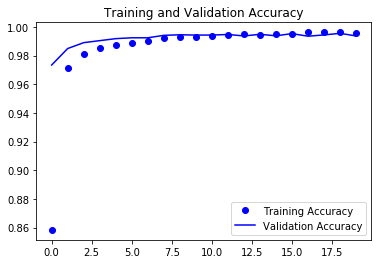

In [10]:
accuracy     = history['acc']
val_accuracy = history['val_acc']
loss         = history['loss']
val_loss     = history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [11]:
score = model.evaluate(X_test,Y_test)
print("Test score:",score[0])
print("Test accuracy:",score[1])

10000/10000 [==============================] - 1s 73us/step
Test score: 0.08860816788788954
Test accuracy: 0.994


In [12]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

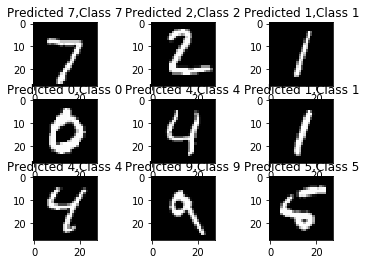

In [13]:
plt.figure()
for i,correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("Predicted {},Class {}".format(predicted_classes[correct],y_test[correct]))

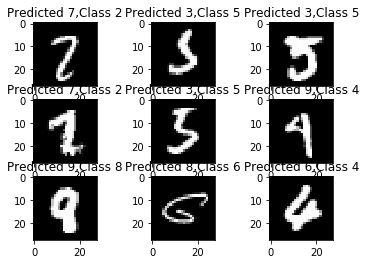

In [14]:
plt.figure()
for i,incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28),cmap='gray',interpolation='none')
    plt.title("Predicted {},Class {}".format(predicted_classes[incorrect],y_test[incorrect]))